<a href="https://colab.research.google.com/github/ZebelEmp/DevC_Assignment/blob/master/Copy_of_Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style("whitegrid")

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df = pd.read_csv(link, encoding = 'latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# List all NaN values
df[(df['Description'].isnull()) | df['CustomerID'].isnull()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
234243,557502,22489,PACK OF 12 TRADITIONAL CRAYONS,1,6/20/11 15:32,0.83,NaN,United Kingdom
474520,576840,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,11/16/11 15:23,4.13,NaN,United Kingdom
470711,576618,22263,FELT EGG COSY LADYBIRD,3,11/15/11 17:00,1.63,NaN,United Kingdom
209932,555275,20711,JUMBO BAG TOYS,2,6/1/11 17:18,4.13,NaN,United Kingdom
264282,560090,22375,AIRLINE BAG VINTAGE JET SET BROWN,1,7/14/11 16:46,4.13,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
df = df[df['Quantity'] >= 0]

**Exclude negative Price entries**

In [0]:
df = df[df['UnitPrice'] >= 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [10]:
# Your code here
highest_id = df[df['Country'] == 'United Kingdom']['CustomerID'].value_counts().head(1).index
#highest_id = highest_id.astype('float')
highest_id = highest_id.values[0]
df[df['CustomerID'] == highest_id]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,12/1/10 14:41,0.42,17841.0,United Kingdom
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,12/1/10 14:41,1.45,17841.0,United Kingdom
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,12/1/10 14:41,1.45,17841.0,United Kingdom
2040,536557,22731,3D CHRISTMAS STAMPS STICKERS,1,12/1/10 14:41,1.25,17841.0,United Kingdom
2041,536557,21258,VICTORIAN SEWING BOX LARGE,1,12/1/10 14:41,12.75,17841.0,United Kingdom
2042,536557,21041,RED RETROSPOT OVEN GLOVE DOUBLE,1,12/1/10 14:41,2.95,17841.0,United Kingdom
2043,536557,84920,PINK FLOWER FABRIC PONY,1,12/1/10 14:41,3.75,17841.0,United Kingdom
2044,536557,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,1,12/1/10 14:41,2.95,17841.0,United Kingdom
2045,536557,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,1,12/1/10 14:41,1.25,17841.0,United Kingdom
2046,536557,84508A,CAMOUFLAGE DESIGN TEDDY,1,12/1/10 14:41,2.55,17841.0,United Kingdom


**The customer with the highest money spent on purchases comes from Netherlands**

In [11]:
# Your code here
newdf = df
newdf['Total'] = newdf['Quantity'] * newdf['UnitPrice']
newdf[newdf['Country'] == 'Netherlands'].groupby(by = 'CustomerID').sum().sort_values(by = 'Total', ascending = False).head(1)


,Quantity,UnitPrice,Total
CustomerID,,,
14646.0,196915,5176.09,280206.02


**On which year had the highest sales?**

In [12]:
# Your code here

#newdf.groupby(by = 'Year').sum().sort_values(by = 'Total', ascending = False).head(1)

newdf['Year'] = newdf['InvoiceDate'].str.extract('(\d+\s)')
newdf['Year'] = '20' + newdf['Year']
newdf['Year'].str.strip()
newdf.groupby('Year').sum().sort_values(by = 'Total', ascending = False).head(1)

,Quantity,UnitPrice,CustomerID,Total
Year,,,,
2011,5229137,1.871543e+06,5.679210e+09,9.842938e+06


**How many orders (per hour)?**

In [13]:

newdf['Hour'] = newdf['InvoiceDate'].str.extract('(\s\d+)')
newdf['Hour'].str.strip()
orderPerHour2 = newdf['Hour'].value_counts()
orderPerHour2

 12    77120
 15    76246
 13    71001
 14    65937
 11    56139
 16    53369
 10    47822
 9     33701
 17    27563
 8      8800
 18     7709
 19     3515
 20      802
 7       379
 6         1
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

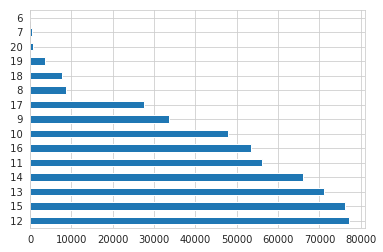

In [14]:
orderPerHour2.plot(kind = 'barh')

**How many orders (per month)?**

In [15]:
newdf['Month'] = newdf['InvoiceDate'].str.extract('(^\d+)')
newdf['Month'].str.strip()
orderPerMonth = newdf['Month'].value_counts()
orderPerMonth

11    83369
12    66591
10    59304
9     49261
7     38645
5     36164
6     35977
3     35803
8     34483
1     34306
4     29096
2     27105
Name: Month, dtype: int64

**Make a plot about number of orders per month**

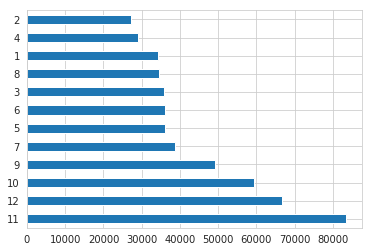

In [16]:
orderPerMonth.plot(kind = 'barh')

**Top 10 items most sales**

In [17]:
df['Description'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Country
Netherlands    200361
EIRE           147173
Germany        119261
France         112103
Australia       83901
Sweden          36083
Switzerland     30629
Spain           27940
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64


[(0, 346319.22329902154)]

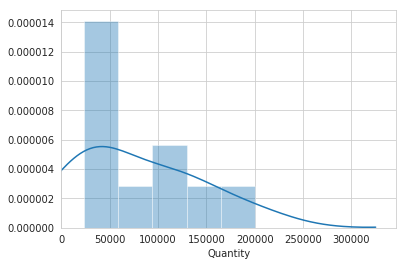

In [18]:
# Your code here
top10 = df[df['Country'] != 'United Kingdom'].groupby(by = 'Country').sum().sort_values(by = 'Quantity', ascending = False).head(10)
print(top10['Quantity'])
sns.distplot(top10['Quantity'], bins = 5).set(xlim = (0))
# What can you tell about this?
# the orders mostly came from the surrounding countries of UK so I expected that UK wp be at the top in terms of quantity

### You are awesome!!